## ML PROJECT 
---

Authors
 Andrea Scarpellini 
 Martina Scarpellini 


At first, we imported the dataset and printed it. 
It has 3000 rows and 16 columns.

In [427]:
import pandas as pd
import numpy as np

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('tyres_train.csv')
print(df.shape)

(3000, 16)


In [428]:
df.head()

,vulc,perc_nat_rubber,wiring_strength,weather,perc_imp,temperature,tread_type,tyre_season,elevation,month,tread_depth,tyre_quality,perc_exp_comp,diameter,add_layers,failure
0,17.990,26,1,0.16,0.01,-8.12,0,1,332.5,8,0,1,5.13,55.0,1,0
1,20.704,36,1,0.30,0.01,-4.52,2,0,328.0,11,1,0,6.15,NaN,1,0
2,19.156,34,1,0.30,0.01,-1.08,0,0,247.0,0,1,0,6.36,NaN,1,0
3,16.802,35,1,0.19,0.02,7.44,1,0,408.0,7,3,1,6.62,54.5,1,0
4,17.140,23,2,0.39,0.01,30.52,0,1,308.0,2,2,0,6.15,76.3,1,0


Then we watched if our data were imbalanced or not.
We noticed that they were imbalanced (the zeros were twice the one labelled observations).

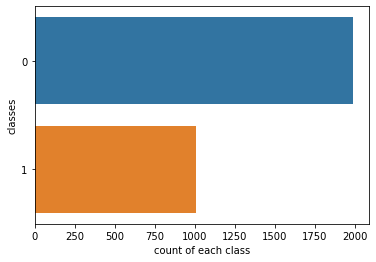

In [429]:
#Visualize Class Counts
sns.countplot(y=df.failure ,data=df) 
plt.xlabel("count of each class")
plt.ylabel("classes")
plt.show()

 - Unbalanced Dataset:
     0 labelled observations are twice the one labelled observations

## MISSING VALUES

We wanted to look for missing values in our dataset.
We noticed that the coloumn 'diameter' was the only one with at least one missing value
(because it was the only one that gave 'true' as output).

In [430]:
#in which column of our dataset is there at least a missing values?
df.isna().any()

vulc               False
perc_nat_rubber    False
wiring_strength    False
weather            False
perc_imp           False
temperature        False
tread_type         False
tyre_season        False
elevation          False
month              False
tread_depth        False
tyre_quality       False
perc_exp_comp      False
diameter            True
add_layers         False
failure            False
dtype: bool

We searched the percentage of Nan values in the diameter.
We found that it was more than 70%.
We decided to omit the diameter attribute from our analysis.

In [431]:
#percentage of NaN values in "diameter"
a=df['diameter'].isna().sum();
print("NaN value in diameter:",a)
print("Perc of NaN:", a/len(df)*100,"%")


NaN value in diameter: 2110
Perc of NaN: 70.33333333333334 %


So we can omit the diameter attribute from the analysis

We listed all the attributes: 

Attributes: 
- vulc            Numerical 
- perc_nat_rubber Numerical
- weather         Numerical
- perc_imp        Numerical
- temperature     Numerical 
- elevation       Numerical
- perc_exp_comp   Numerical
- diameter        Numerical
- tread_type      Categorical 
- tyre_season     Categorical 
- month           Categorical 
- tread_depth     Categorical 
- wiring_strenght Categorical
- tyre_quality    Categorical 
- add_layers      Categorical


Categorical attributes assume a finite number of distinct values, in most cases limited to less than a hundred, representing a qualitative property of
an entity to which they refer.
Numerical attributes assume a finite or infinite number of values and lend themselves to subtraction or division operations.

We identified the datatype of our data.
Some of the data are integers and some others are float. 

In [432]:
#come trattiamo le variabili categoriche 
print(df.dtypes)

vulc               float64
perc_nat_rubber      int64
wiring_strength      int64
weather            float64
perc_imp           float64
temperature        float64
tread_type           int64
tyre_season          int64
elevation          float64
month                int64
tread_depth          int64
tyre_quality         int64
perc_exp_comp      float64
diameter           float64
add_layers           int64
failure              int64
dtype: object


We have 7 categorical variables and 7 numerical.
We don't consider the 'diameter' because is full of Nan values. 

In [433]:
#non considero la colonna dei diametri perchè ci sono un sacco di nan e i valori non sono facili da predire 
cat=df[["tyre_season","month",          "tread_depth","wiring_strength","tyre_quality","tread_type","add_layers" ]]
num=df[["vulc",       "perc_nat_rubber","weather",    "perc_imp",       "temperature", "elevation", "perc_exp_comp"]]

print(cat.shape)
print(num.shape)

(3000, 7)
(3000, 7)


# CATEGORICAL DATA

In [434]:
cat.head()

,tyre_season,month,tread_depth,wiring_strength,tyre_quality,tread_type,add_layers
0,1,8,0,1,1,0,1
1,0,11,1,1,0,2,1
2,0,0,1,1,0,0,1
3,0,7,3,1,1,1,1
4,1,2,2,2,0,0,1


In [435]:
num.head()

,vulc,perc_nat_rubber,weather,perc_imp,temperature,elevation,perc_exp_comp
0,17.990,26,0.16,0.01,-8.12,332.5,5.13
1,20.704,36,0.30,0.01,-4.52,328.0,6.15
2,19.156,34,0.30,0.01,-1.08,247.0,6.36
3,16.802,35,0.19,0.02,7.44,408.0,6.62
4,17.140,23,0.39,0.01,30.52,308.0,6.15


We plot the histograms of the seven categorical variables.

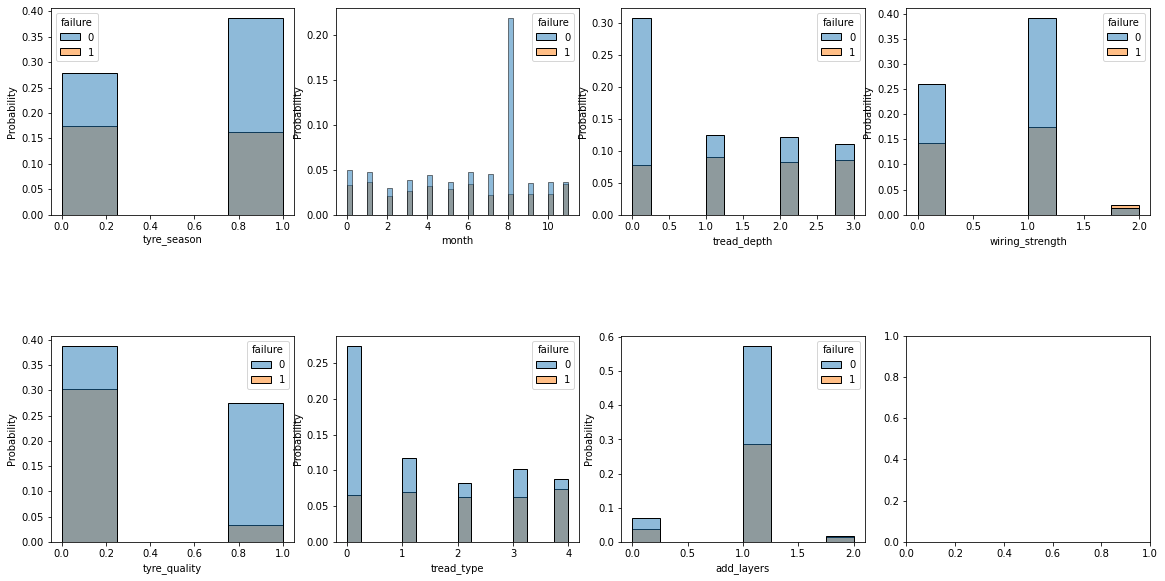

In [436]:
cat_plot=df[["tyre_season","month","tread_depth","wiring_strength","tyre_quality","tread_type","add_layers","failure"]]
fig, axes = plt.subplots(2, 4,figsize=[16,8])
axes = axes.flatten()
fig.tight_layout(h_pad=10)
i=0
for x in cat.columns:
    sns.histplot(data=cat_plot, x=x, hue="failure",stat ='probability' , ax=axes[i], binwidth=1/4 ,bins=len(set(cat_plot[x])))
    i=i+1
plt.show()

In [437]:
#categorical variables have the "object" type
#Categorical variables must be changed in the pre-processing section
#since machine learning models require numeric input variables
cat = cat.astype(str)
cat.dtypes

tyre_season        object
month              object
tread_depth        object
wiring_strength    object
tyre_quality       object
tread_type         object
add_layers         object
dtype: object

We can observe a peak of 0 labeled observations in correspondence of "month" = 8. Since there are no reasons why there should be so many more 0 labeled observations in September, we will consider "month" a noise-affected attribute.

So we try to correct month 8

In [438]:
#try to correct month 8
print(((df['month']==8) & (df['failure']==0)).sum())
print(((df['month']==8) & (df['failure']==1)).sum())

#too many items to delete o change the labels --> so i wont consider the month column 

655
69


## ENTROPY  e  GINI 

In [439]:
import collections
def CountFrequency(arr):
    return collections.Counter(arr)

def entropy(x):
    e=0
    for i in range(0,len(set(x))):
        e=e+CountFrequency(x)[i]/len(x) * np.log2( CountFrequency(x)[i]/len(x) )
    return -e 

#gini function 
def gini(x):
    tot=0
    for i in range(0,len(set(x))):
        tot=tot+ (CountFrequency(x)[i]/len(x))**2
    return 1-tot 


In [440]:
categories=['tyre_season','month','tread_depth','wiring_strength','tyre_quality','tread_type','add_layers'];

print("GINI --> 0.5 MAX ETEROGENETY\nGINI --> 0.0 MAX HOMOGENEITY**")
print("EI   --> 1   MAX ETEROGENETY\nEI   --> 0.0 MAX HOMOGENEITY**\n\n")
#gini index for categories:
for j in categories:
    print("-->",j,":\n")
    for i in set(df[j]):
        lis=(np.array([df[df[j]==i]['failure']])).astype(int)
        print(j ,"=",i) 
        print('Gini index:', round(gini(lis[0]),3), " || Entropy index:", round(entropy(lis[0]),3))
    
    print("##")
    print("\n")


GINI --> 0.5 MAX ETEROGENETY
GINI --> 0.0 MAX HOMOGENEITY**
EI   --> 1   MAX ETEROGENETY
EI   --> 0.0 MAX HOMOGENEITY**


--> tyre_season :

tyre_season = 0
Gini index: 0.474  || Entropy index: 0.962
tyre_season = 1
Gini index: 0.416  || Entropy index: 0.875
##


--> month :

month = 0
Gini index: 0.48  || Entropy index: 0.97
month = 1
Gini index: 0.491  || Entropy index: 0.987
month = 2
Gini index: 0.486  || Entropy index: 0.98
month = 3
Gini index: 0.482  || Entropy index: 0.973
month = 4
Gini index: 0.487  || Entropy index: 0.981
month = 5
Gini index: 0.492  || Entropy index: 0.988
month = 6
Gini index: 0.489  || Entropy index: 0.983
month = 7
Gini index: 0.442  || Entropy index: 0.915
month = 8
Gini index: 0.172  || Entropy index: 0.454
month = 9
Gini index: 0.476  || Entropy index: 0.965
month = 10
Gini index: 0.474  || Entropy index: 0.962
month = 11
Gini index: 0.499  || Entropy index: 0.999
##


--> tread_depth :

tread_depth = 0
Gini index: 0.321  || Entropy index: 0.724
tread

In [441]:
#month not considered 
selection_categorical=['tyre_season','tread_depth','wiring_strength','tyre_quality','tread_type','add_layers'];
dummies = pd.get_dummies(cat[selection_categorical]) 
dummies.tail()

,tyre_season_0,tyre_season_1,tread_depth_0,tread_depth_1,tread_depth_2,tread_depth_3,wiring_strength_0,wiring_strength_1,wiring_strength_2,tyre_quality_0,tyre_quality_1,tread_type_0,tread_type_1,tread_type_2,tread_type_3,tread_type_4,add_layers_0,add_layers_1,add_layers_2
2995,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0
2996,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0
2997,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0
2998,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0
2999,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0


## NUMERICAL DATA

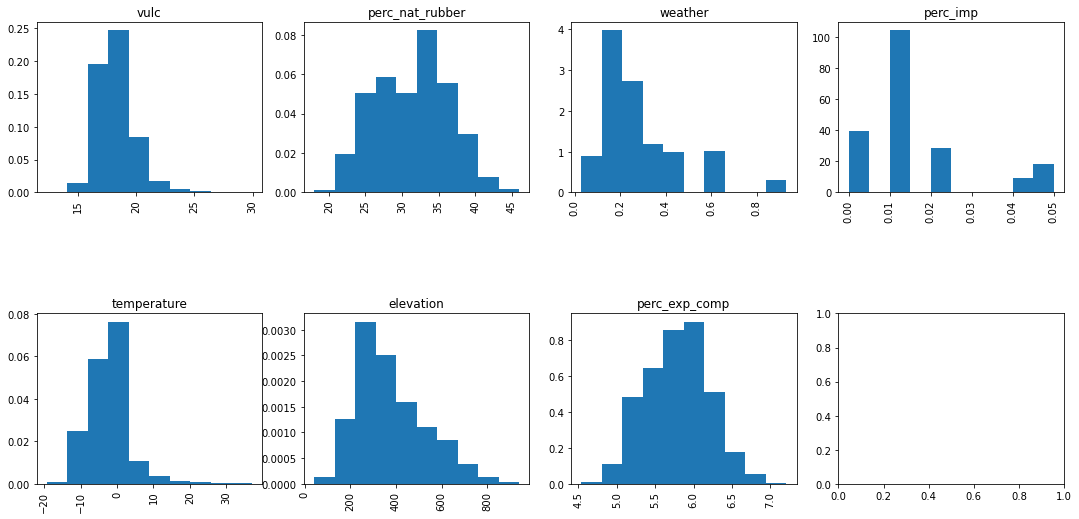

In [442]:
fig, axes = plt.subplots(2, 4,figsize=[15,7])
axes = axes.flatten()
fig.tight_layout(h_pad=10)

i=0
for x in num.columns:
    plt.sca(axes[i]) # set the current Axes
    plt.hist(num[x],density=True)
    plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
    plt.title(x)
    i+=1
plt.show()

array([[<AxesSubplot:title={'center':'vulc'}>,
        <AxesSubplot:title={'center':'logvulc'}>,
        <AxesSubplot:title={'center':'weather'}>,
        <AxesSubplot:title={'center':'logweather'}>],
       [<AxesSubplot:title={'center':'perc_imp'}>,
        <AxesSubplot:title={'center':'logpercimp'}>,
        <AxesSubplot:title={'center':'elevation'}>,
        <AxesSubplot:title={'center':'logelevation'}>]], dtype=object)

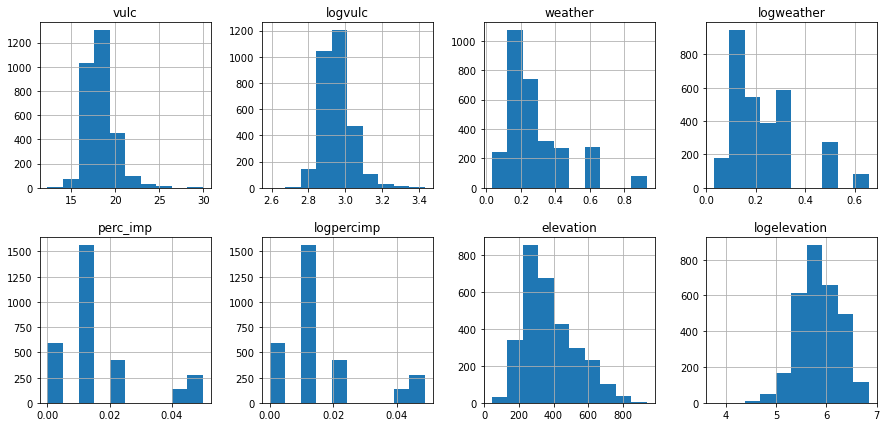

In [443]:
import math
pd.options.mode.chained_assignment = None # no warning on creating a new column

num['logvulc']=num['vulc'].apply(lambda x: math.log(x+1))
num['logweather']=num['weather'].apply(lambda x: math.log(x+1))
num['logpercimp']=num['perc_imp'].apply(lambda x: math.log(x+1))
num['logelevation']=num['elevation'].apply(lambda x: math.log(x+1))

num[['vulc','logvulc',
             'weather','logweather',
             'perc_imp','logpercimp',
             'elevation','logelevation' ]].hist(layout=(2,4), figsize=(15,7))

In [444]:
num.columns

Index(['vulc', 'perc_nat_rubber', 'weather', 'perc_imp', 'temperature',
       'elevation', 'perc_exp_comp', 'logvulc', 'logweather', 'logpercimp',
       'logelevation'],
      dtype='object')

In [449]:
sel_num=['vulc', 'perc_nat_rubber', 'weather', 'perc_imp', 'temperature', 'perc_exp_comp','logelevation']
num=num[sel_num]

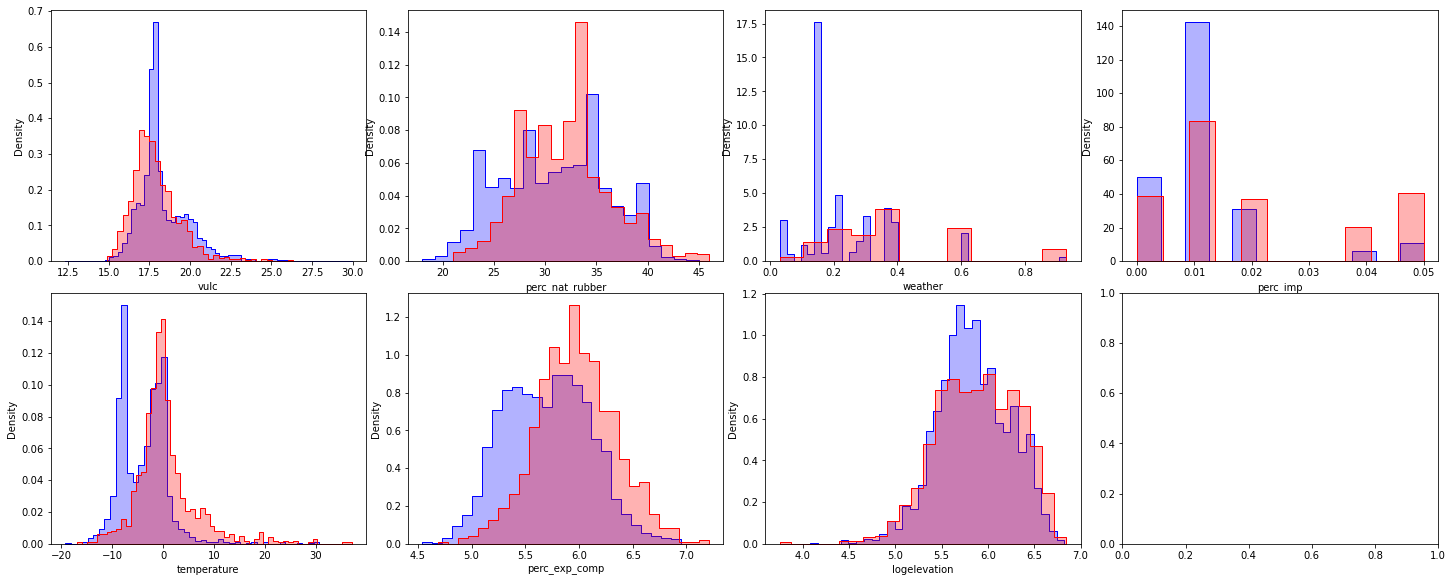

In [450]:
X0 = num[df['failure']==0]
X1 = num[df['failure']==1]

fig, axes = plt.subplots(ncols=4, nrows=2, figsize=(20,8))
fig.tight_layout()

for i, ax in zip(range(cat.columns.size), axes.flat):
    sns.histplot(X0.iloc[:,i], color="blue", ax=ax, stat='density', element="step",  alpha=0.3)
    sns.histplot(X1.iloc[:,i], color="red", ax=ax,stat='density', element="step",  alpha=0.3)
plt.show()

##provare ad applicare quache trasf

## STANDARDIZATION 

We did the standardization in order to obtain boxplots in the same range.

<AxesSubplot:>

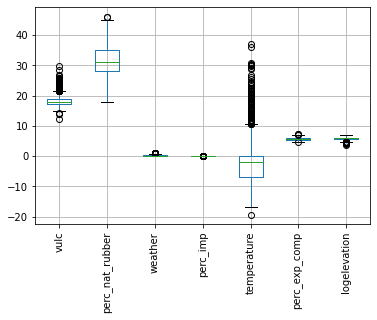

In [451]:
num.boxplot(rot=90)

#elevation has totally different numbers --> standardization 

In [452]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(num) # No target
scaled_num = pd.DataFrame(scaler.transform(num))
scaled_num.columns = num.columns
scaled_num.tail()

,vulc,perc_nat_rubber,weather,perc_imp,temperature,perc_exp_comp,logelevation
2995,-0.231083,-0.456093,0.584065,-0.319087,1.702514,-0.271809,-0.462821
2996,-0.698653,-0.253355,-0.343773,-1.020379,0.164930,0.045070,-2.016652
2997,-1.269567,0.354859,0.584065,-0.319087,-0.187726,-0.539937,-0.957449
2998,0.433093,1.165810,-1.380768,-1.020379,0.284834,0.240072,-0.441574
2999,1.315301,0.354859,-1.217032,-1.020379,0.912563,0.508200,0.378516


<AxesSubplot:>

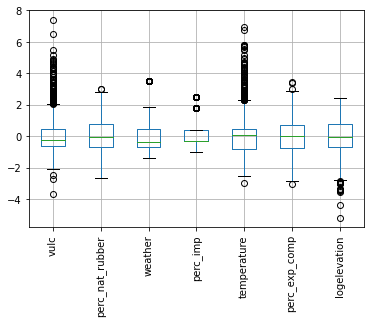

In [454]:
scaled_num.boxplot(rot=90)

#ok! 

## PCA

In [455]:
#PCA fit
from sklearn.decomposition import PCA
# we can choose the number of components e.g. 10, the percentage of the total variance or set it to None (that means it automatically chooses the number of components)
pca = PCA()
pca.fit(scaled_num) #The fit learns some quantities from the data, most importantly the "components" and "explained variance"

PCA()

In [456]:
#let's use the pca to transform the dataset
num_pca = pd.DataFrame(pca.transform(scaled_num))
num_pca.columns =['PC1','PC2','PC3','PC4','PC5','PC6','PC7']
num_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-2.012359,1.013312,0.140414,-0.310766,-0.064363,0.368618,0.068869
1,0.257987,-1.426708,1.289148,0.459799,0.140380,-0.641850,-0.277733
2,0.647584,-1.057340,0.081115,1.057527,0.475285,-0.731836,-0.205728
3,1.990059,-1.251383,-1.557192,-0.058523,0.291145,-0.288992,0.921453
4,2.814893,-0.493982,-2.969107,0.475155,3.056376,3.404511,-0.163897
...,...,...,...,...,...,...,...
2995,0.660893,0.154897,-0.779314,0.506321,0.674380,1.366112,-0.495467
2996,-0.812868,0.057538,-1.193362,1.880343,0.190467,-0.049267,-0.381057
2997,-0.094339,0.790495,-0.791869,0.907871,-1.003289,0.074029,-0.571855
2998,-0.672461,-1.838463,-0.269429,0.726145,-0.399143,0.121232,0.471260


In [457]:
pd.DataFrame(pca.components_,index=['PC1','PC2','PC3','PC4','PC5','PC6','PC7'],columns=num.columns)

,vulc,perc_nat_rubber,weather,perc_imp,temperature,perc_exp_comp,logelevation
PC1,-0.081949,0.291859,0.512896,0.445815,0.471033,0.455399,0.130499
PC2,-0.390335,-0.489377,0.370810,0.498347,-0.233519,-0.370533,-0.174564
PC3,0.800150,0.180656,0.229710,0.330300,-0.338227,-0.219206,0.053010
PC4,0.065554,0.218401,0.032100,-0.023663,0.092740,0.040183,-0.967573
PC5,0.423758,-0.765225,-0.069755,0.004130,0.302546,0.357660,-0.102580
PC6,0.124202,0.015077,0.024383,-0.070499,0.705877,-0.691143,0.053305
PC7,-0.037274,0.095898,-0.734970,0.662007,0.103935,0.007225,-0.011190


In [458]:
pd.DataFrame(pca.explained_variance_).transpose()

,0,1,2,3,4,5,6
0,2.598115,1.16474,1.042887,0.971148,0.713823,0.332024,0.179597


          0         1         2         3         4         5         6
0  0.371036  0.166336  0.148934  0.138689  0.101941  0.047416  0.025648


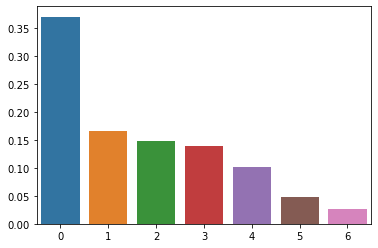

In [459]:
#VISUALIZE The percentage of variance explained by each of the selected components.
explained_var=pd.DataFrame(pca.explained_variance_ratio_).transpose()
print(explained_var)
ax = sns.barplot( data=explained_var)

In [460]:
cum_explained_var=np.cumsum(pca.explained_variance_ratio_)
cum_explained_var= pd.DataFrame(cum_explained_var).transpose()
cum_explained_var

,0,1,2,3,4,5,6
0,0.371036,0.537372,0.686306,0.824995,0.926936,0.974352,1.0


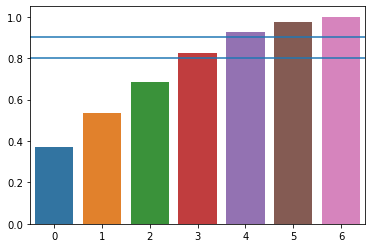

In [461]:
ax = sns.barplot(data=cum_explained_var)
ax.axhline(0.9)
ax.axhline(0.8)

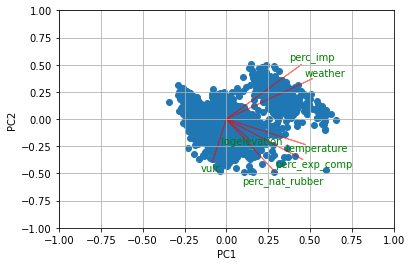

In [462]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

#Call the function. Use only the 2 PCs.
myplot(pca.transform(scaled_num)[:,0:2],np.transpose(pca.components_[0:2, :]), num.columns)
plt.show()



#perc_imp e wheater sono correlate? 

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

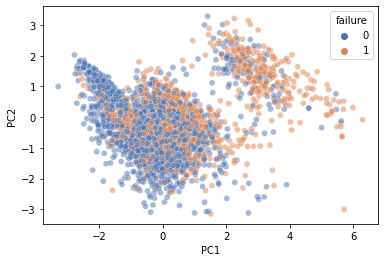

In [463]:
sns.scatterplot(x="PC1", y="PC2",
              hue=df['failure'], alpha=0.5,
              data=num_pca,
              palette='deep')

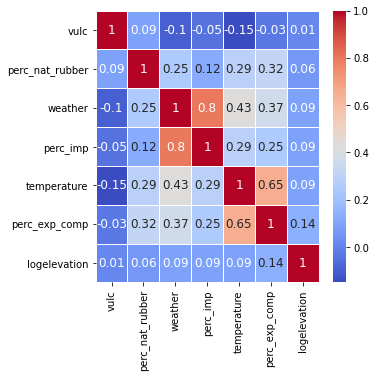

In [464]:
plt.figure(figsize = (5,5))
sns.heatmap(data=scaled_num.corr().round(2), cmap='coolwarm', linewidths=.5, annot=True, annot_kws={"size":12})
plt.show()

#perc_imp e  weather !! does make it sense?

## Concatenation 
As first part of the analysis we deal with not over-sampled data, so with an unbalanced dataset.

In [465]:
X=pd.concat([scaled_num,dummies], axis = 1)
print(X.shape)
X.tail()

(3000, 26)


,vulc,perc_nat_rubber,weather,perc_imp,temperature,perc_exp_comp,logelevation,tyre_season_0,tyre_season_1,tread_depth_0,...,tyre_quality_0,tyre_quality_1,tread_type_0,tread_type_1,tread_type_2,tread_type_3,tread_type_4,add_layers_0,add_layers_1,add_layers_2
2995,-0.231083,-0.456093,0.584065,-0.319087,1.702514,-0.271809,-0.462821,0,1,0,...,0,1,0,1,0,0,0,0,1,0
2996,-0.698653,-0.253355,-0.343773,-1.020379,0.164930,0.045070,-2.016652,0,1,0,...,1,0,0,1,0,0,0,0,1,0
2997,-1.269567,0.354859,0.584065,-0.319087,-0.187726,-0.539937,-0.957449,1,0,0,...,0,1,0,1,0,0,0,1,0,0
2998,0.433093,1.165810,-1.380768,-1.020379,0.284834,0.240072,-0.441574,1,0,1,...,1,0,0,0,0,0,1,1,0,0
2999,1.315301,0.354859,-1.217032,-1.020379,0.912563,0.508200,0.378516,1,0,0,...,1,0,0,1,0,0,0,1,0,0


In [466]:
y=df['failure']
print(len(y))

3000


In [467]:
from sklearn.model_selection import train_test_split

#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size =0.30,   
                                                    stratify=y,        #preserve target propotions (probviamo non stratificata)
                                                    random_state= 321) #fix random seed for replicability

print( X_train.shape, X_test.shape)

(2100, 26) (900, 26)


## Models

In [468]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

In [469]:
#funzioni 


def hyperp_search(classifier, parameters):
    gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=10, n_jobs=-1)
    gs = gs.fit(X_train, y_train)
    print("f1_train: %f using %s" % (gs.best_score_, gs.best_params_))

    best_model = gs.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_train = best_model.predict(X_train)
    print("\n")
    print("f1         train %.3f   test %.3f" % (f1_score(y_train, y_pred_train), f1_score(y_test, y_pred) ))  
    print("\n")
    print(confusion_matrix(y_test, y_pred))
    return ( f1_score(y_train, y_pred_train),f1_score(y_test, y_pred) )

def roc(model,X_train,y_train,X_test,y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

    fpr, tpr, thresholds1=metrics.roc_curve(y_test,  y_probs[:,1])

    import matplotlib.pyplot as plt
    plt.plot(fpr, tpr, label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

    auc = metrics.roc_auc_score(y_test, y_probs[:,1])
    print('AUC: %.3f' % auc)
    return (fpr, tpr ,auc)

## KNN 

In [470]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
parameters = {'n_neighbors':np.arange(5,100,1)}
knn_f1_train,knn_f1_test = hyperp_search(classifier,parameters)

Fitting 3 folds for each of 95 candidates, totalling 285 fits
f1_train: 0.549889 using {'n_neighbors': 15}


f1         train 0.602   test 0.548


[[513  85]
 [156 146]]


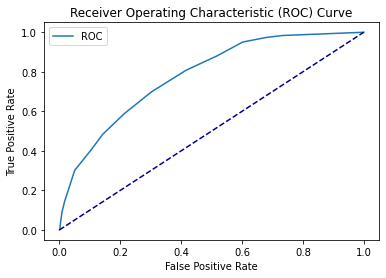

AUC: 0.780


In [471]:
model_knn = KNeighborsClassifier(n_neighbors=15)
fpr1,tpr1,AUC1=roc(model_knn,X_train,y_train,X_test,y_test)

## TREE 

In [472]:
#Tree
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
parameters = {'criterion': ['entropy','gini'], 
              'max_depth':          np.arange(2,10,1),
              'min_samples_split':  np.arange(2,20,1),
              'min_samples_leaf':   np.arange(2,40,1)}

tree_f1_train,tree_f1_test=hyperp_search(classifier,parameters)

Fitting 3 folds for each of 10944 candidates, totalling 32832 fits
f1_train: 0.530159 using {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 39, 'min_samples_split': 2}


f1         train 0.589   test 0.580


[[523  75]
 [148 154]]


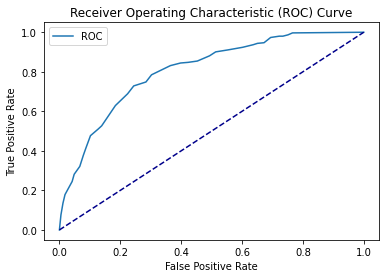

AUC: 0.807


In [48]:
model_tree = DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=39, min_samples_split=2)

fpr2,tpr2,AUC2=roc(model_tree,X_train,y_train,X_test,y_test)


## Naive Bayes 

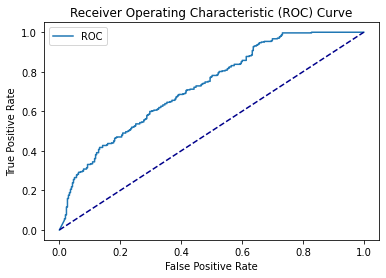

AUC: 0.724


In [67]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB #or alternative NB implementations

model = GaussianNB()

model.fit(X_train, y_train)
y_pred=model.predict(X_test)



y_probs = model.predict_proba(X_test) 
fpr3,tpr3,AUC3=roc(model,X_train,y_train,X_test,y_test)

## Logistic

In [123]:
# Logistic

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
parameters = {"C":np.arange(1,10,1), "max_iter":[1000] }


logi_f1_train,logi_f1_test=hyperp_search(classifier,parameters)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
f1_train: 0.542723 using {'C': 9, 'max_iter': 1000}


f1         train 0.541   test 0.596


[[518  80]
 [140 162]]


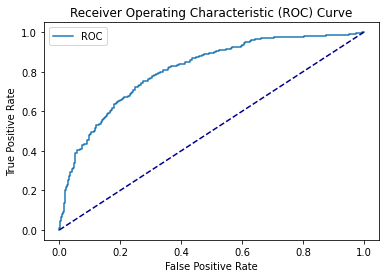

AUC: 0.810


In [52]:
model = LogisticRegression(C=9, max_iter=1000)

fpr4,tpr4,AUC4=roc(model,X_train,y_train,X_test,y_test)


## SUPPORT VECTOR MACHINE

In [125]:
from sklearn.svm import SVC

classifier = SVC()
parameters = {"kernel":['linear','sigmoid','rbf'],
              "C":[0.001,0.005,0.1,0.5,5,60,70,80]}

SV_f1_train,SV_f1_test=hyperp_search(classifier,parameters)


#OVER-FITTING: using {'C': 50, 'kernel': 'rbf'}
# so we omit the 'rbf' among the possible parameters. 

Fitting 3 folds for each of 24 candidates, totalling 72 fits
f1_train: 0.557433 using {'C': 0.1, 'kernel': 'sigmoid'}


f1         train 0.558   test 0.574


[[468 130]
 [128 174]]


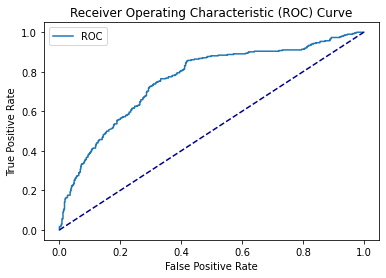

AUC: 0.760


In [54]:
model = SVC(C=0.1, kernel='sigmoid',probability=True)

fpr5,tpr5,AUC5=roc(model,X_train,y_train,X_test,y_test)

## NEURAL NETWORK

In [39]:
# Multi-layer Perceptron classifier

from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier()
parameters = {"hidden_layer_sizes":[(14,7),(10, 5),(20, 10, 5),(50,10,5)], 
              "max_iter": [2000],
              "alpha": [0.001,0.01,1],
              "activation":['identity', 'logistic', 'tanh', 'relu'],
              "solver":    ['lbfgs', 'sgd', 'adam'],
              "learning_rate":['constant', 'invscaling', 'adaptive']}

NN_f1_train,NN_f1_test=hyperp_search(classifier,parameters)

#over fitting with: 'alpha': 0.1, 'hidden_layer_sizes': (100, 20, 5), 'max_iter': 2000
#over fitting 

Fitting 3 folds for each of 3 candidates, totalling 9 fits
f1_train: 0.560905 using {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (20, 10, 5), 'learning_rate': 'adaptive', 'max_iter': 2000, 'solver': 'sgd'}
f1         train 0.588   test 0.608
precision  train 0.670   test 0.652

[[506  92]
 [130 172]]


(0.588235294117647, 0.607773851590106)

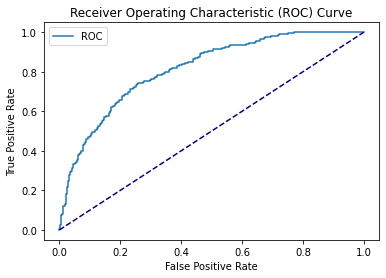

AUC: 0.813


In [41]:
model_MLP=MLPClassifier(activation='relu',
                        alpha= 0.001,
                        hidden_layer_sizes= (20,10, 5),
                        learning_rate= 'adaptive',
                        max_iter= 2000,
                        solver='sgd')

fpr6,tpr6,AUC6=roc(model_MLP,X_train,y_train,X_test,y_test)

## RANDOM FOREST 

In [41]:
from sklearn.ensemble import RandomForestClassifier


classifier= RandomForestClassifier()
parameters = {'n_estimators' :     np.arange(22,27,1),
              'criterion' :        ['entropy', 'gini'],
              'max_depth' :        np.arange(2,8 ,1), 
              'min_samples_split': np.arange(2,20,1),
              'min_samples_leaf' : np.arange(2,40,1)
             };

RF_f1_train,RF_f1_test=hyperp_search(classifier,parameters)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
f1_train: 0.534211 using {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 24}
f1         train 0.626   test 0.581
precision  train 0.806   test 0.726

[[543  55]
 [156 146]]


(0.6256499133448874, 0.58051689860835)

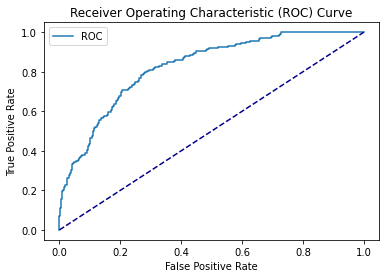

AUC: 0.825


In [45]:
rand_forest=RandomForestClassifier(criterion= 'gini', max_depth= 7, min_samples_leaf= 4, min_samples_split= 6, n_estimators= 24)
fpr7,tpr7,AUC7=roc(rand_forest,X_train,y_train,X_test,y_test)

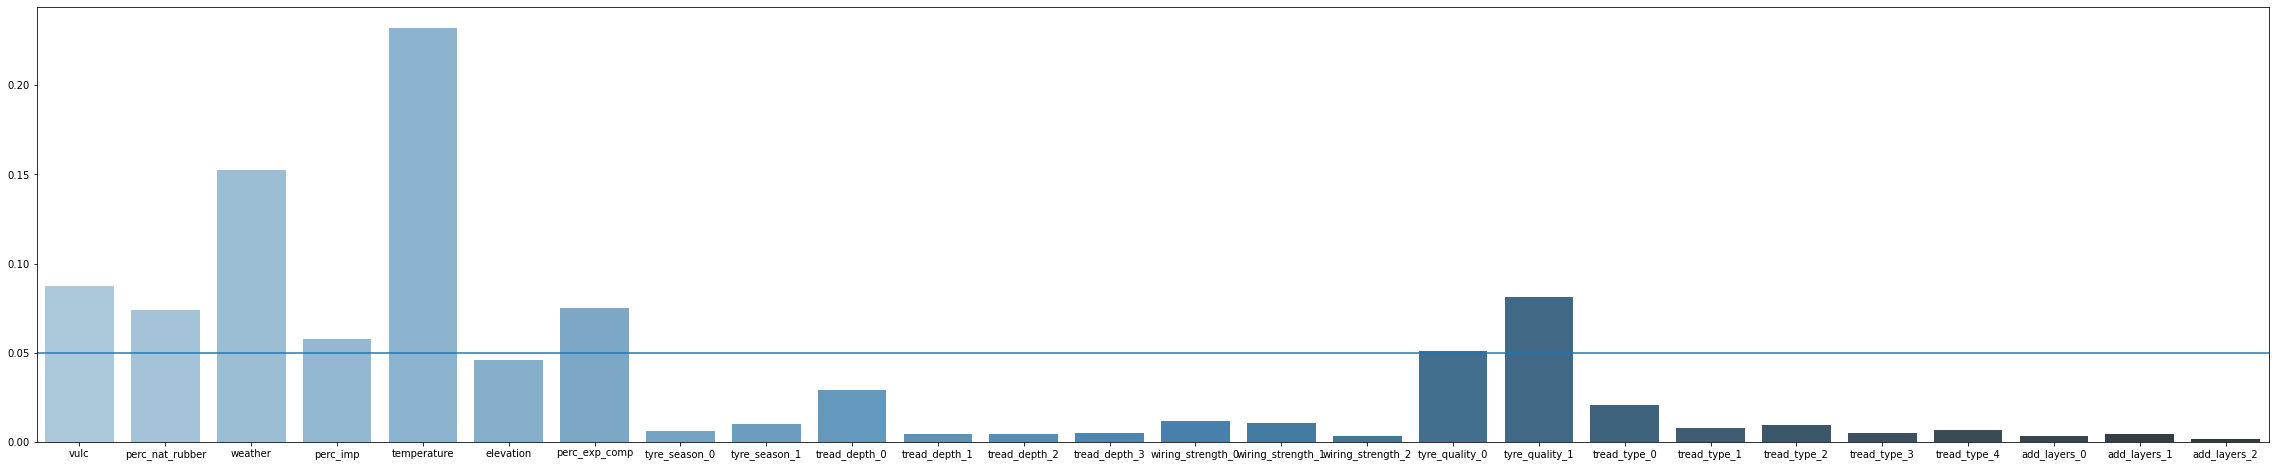

In [46]:
fig, axes = plt.subplots(figsize=[40,8])
graph=sns.barplot(x=X_train.columns, y=rand_forest.feature_importances_, palette="Blues_d")
graph.axhline(0.05)

## ADA BOOST 

In [690]:
from sklearn.ensemble import AdaBoostClassifier


classifier= AdaBoostClassifier()
parameters = {'n_estimators'  : [2000,3000,5000,6000],
              'learning_rate' : [0.0001, 0.01, 0.1, 1, 10],
              'algorithm': ['SAMME', 'SAMME.R']}

ADAB_f1_train,ADAB_f1_test=hyperp_search(classifier,parameters)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
f1_train: 0.551411 using {'algorithm': 'SAMME.R', 'learning_rate': 0.01, 'n_estimators': 3000}
f1         train 0.587   test 0.557
precision  train 0.673   test 0.633

[[511  87]
 [152 150]]


(0.5873902633679169, 0.5565862708719852)

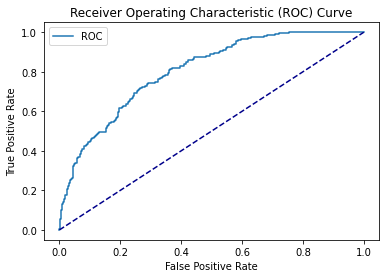

AUC: 0.804


In [691]:
AdaBoost_clf=AdaBoostClassifier(learning_rate= 0.01, n_estimators= 3000,algorithm='SAMME.R')
fpr8,tpr8,AUC8=roc(AdaBoost_clf,X_train,y_train,X_test,y_test)

## ROC CURVE COMPARISON 

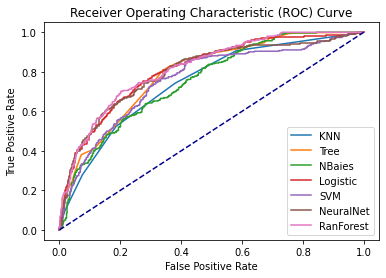

In [583]:
plt.plot(fpr1, tpr1, label= "KNN")
plt.plot(fpr2, tpr2, label= "Tree") 
plt.plot(fpr3, tpr3, label= "NBaies")   
plt.plot(fpr4, tpr4, label= "Logistic")
plt.plot(fpr5, tpr5, label= "SVM")
plt.plot(fpr6, tpr6, label= "NeuralNet")
plt.plot(fpr7, tpr7, label= "RanForest")
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


In [152]:
F1_TRAIN=[knn_f1_train,tree_f1_train,logi_f1_train,SV_f1_train,NN_f1_train,RF_f1_train,ADAB_f1_train]
F1_TEST= [knn_f1_test, tree_f1_test, logi_f1_test, SV_f1_test, NN_f1_test, RF_f1_test,ADAB_f1_test]
data = {'Name': ['knn','tree','Logistic','SVM','Neural Network','Random Forest','ADABOOST']}
data['f1_train']=F1_TRAIN
data['f1_test']=F1_TEST

data=pd.DataFrame(data)

In [153]:
data

,Name,f1_train,f1_test
0,knn,0.596091,0.553271
1,tree,0.589212,0.578947
2,Logistic,0.541292,0.595588
3,SVM,0.557803,0.574257
4,Neural Network,0.588000,0.608000
5,Random Forest,0.626000,0.581000
6,ADABOOST,0.587000,0.557000


## OVER SAMPLING 

We oversample the train data and not the test data since if train data is unbalanced, our validation data will most likely show the same trait and be unbalanced.

In [473]:
print(len(y_train[y_train==0]))
print(len(y_train[y_train==1]))

1394
706


In [474]:
 from sklearn.utils import resample

df_train=pd.concat([X_train,y_train], axis = 1)

#Down-sample Majority Class
#1) Separate majority and minority classes

df_majority = df_train[df_train.failure==0] 
df_minority = df_train[df_train.failure==1] 
#2) Oversample minority class
df_minority_oversampled = resample(df_minority, 
                                   replace=True,
                                   n_samples=1394,    # number of samples into the minority class 
                                   random_state=123)  # reproducible results
 
#3) Combine oversampled minority class with majority class
df_train_oversampled = pd.concat([df_minority_oversampled, df_majority])
 
#4) Display new class counts
df_train_oversampled.failure.value_counts()

0    1394
1    1394
Name: failure, dtype: int64

In [475]:
y_train=df_train_oversampled['failure']
X_train=df_train_oversampled.loc[:, df_downsampled.columns!='failure']

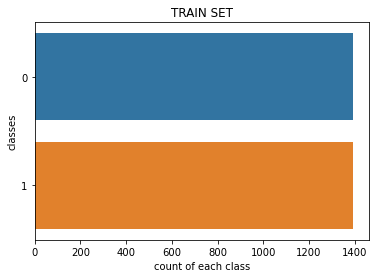

In [476]:
#Visualize Class Counts
sns.countplot(y=y_train[:]) 
plt.xlabel("count of each class")
plt.ylabel("classes")
plt.title("TRAIN SET")
plt.show()

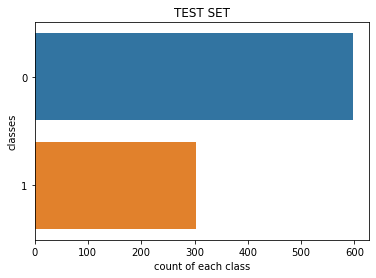

In [477]:
#Visualize Class Counts
sns.countplot(y=y_test[:]) 
plt.xlabel("count of each class")
plt.ylabel("classes")
plt.title("TEST SET")
plt.show()

## KNN - OS

In [481]:
classifier = KNeighborsClassifier()
parameters = {'n_neighbors':np.arange(20,80,1)}
knn_f1_train,knn_f1_test = hyperp_search(classifier,parameters)

print("train")
print(knn_f1_train-knn_f1_test)

Fitting 3 folds for each of 60 candidates, totalling 180 fits
f1_train: 0.725642 using {'n_neighbors': 21}


f1         train 0.754   test 0.612


[[392 206]
 [ 78 224]]
train
0.1423222647340836


## TREE - OS

In [483]:
classifier = DecisionTreeClassifier()
parameters = { 'criterion': ['entropy','gini'], 
               'max_depth':          np.arange(3,6,2),
               'min_samples_leaf':   [2,4,6],
               'min_samples_split':  np.arange(2,15,1)}
               
tree_f1_train,tree_f1_test=hyperp_search(classifier,parameters)

print("\ntrain-test difference:")
print(tree_f1_train-tree_f1_test)

Fitting 3 folds for each of 156 candidates, totalling 468 fits
f1_train: 0.750961 using {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 6}


f1         train 0.768   test 0.610


[[337 261]
 [ 55 247]]

train-test difference:
0.157691024357691


## LOGISTIC - OS

In [401]:

classifier = LogisticRegression()
parameters = {"C":[0.15,0.01,1], "max_iter":[1000] }

logi_f1_train,logi_f1_test=hyperp_search(classifier,parameters)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
f1_train: 0.724601 using {'C': 1, 'max_iter': 1000}


f1         train 0.734   test 0.649


[[413 185]
 [ 68 234]]


## SUPPORT VECTOR MACHINE 

In [339]:
classifier = SVC()
parameters = {"kernel":['linear','sigmoid','rbf'],
              "C":[0.1,0.3],
              "degree":[2,3,4],
              "gamma": [1]}

SV_f1_train,SV_f1_test=hyperp_search(classifier,parameters)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
f1_train: 0.731609 using {'C': 0.3, 'degree': 2, 'gamma': 1, 'kernel': 'rbf'}


f1         train 0.794   test 0.575


[[152 446]
 [  0 302]]


## NEURAL NETWORKS - OS

In [349]:
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier()
parameters = {"hidden_layer_sizes":[(4,2),(6,2)], 
              "max_iter":     [500000],
              "alpha":        [0.01],
              "activation":   ['logistic', 'relu'],
              "learning_rate":['adaptive']}
NN_f1_train,NN_f1_test=hyperp_search(classifier,parameters)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
f1_train: 0.748746 using {'activation': 'logistic', 'alpha': 0.01, 'hidden_layer_sizes': (6, 2), 'learning_rate': 'adaptive', 'max_iter': 500000}


f1         train 0.765   test 0.636


[[403 195]
 [ 70 232]]


## RANDOM FOREST CLASSIFIER - OS

In [484]:
from sklearn.ensemble import RandomForestClassifier

classifier= RandomForestClassifier()
parameters = {'criterion' :        ['entropy', 'gini'],
              'max_depth' :        np.arange(2,5,1),
              'min_samples_leaf' : np.arange(3,11,1),
              'min_samples_split': np.arange(7,9,1),
              'n_estimators' :     np.arange(6,9,1), 
             };

RF_f1_train,RF_f1_test=hyperp_search(classifier,parameters)

Fitting 3 folds for each of 288 candidates, totalling 864 fits
f1_train: 0.758807 using {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 7, 'n_estimators': 8}


f1         train 0.769   test 0.635


[[360 238]
 [ 51 251]]


## ADABOOST

In [399]:
from sklearn.ensemble import AdaBoostClassifier


classifier= AdaBoostClassifier()
parameters = {'n_estimators'  : [1500,2000],
              'learning_rate' : [0.001, 0.01]}

ADAB_f1_train,ADAB_f1_test=hyperp_search(classifier,parameters)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
f1_train: 0.727805 using {'learning_rate': 0.001, 'n_estimators': 1500}


f1         train 0.730   test 0.630


[[339 259]
 [ 44 258]]


In [402]:
F1_TRAIN=[knn_f1_train,tree_f1_train,logi_f1_train,SV_f1_train,NN_f1_train,RF_f1_train,ADAB_f1_train]
F1_TEST= [knn_f1_test, tree_f1_test, logi_f1_test, SV_f1_test, NN_f1_test, RF_f1_test,ADAB_f1_test]
data = {'Name': ['knn','tree','Logistic','SVM','Neural Network','Random Forest','ADABOOST']}
data['f1_train']=F1_TRAIN
data['f1_test']=F1_TEST

data=pd.DataFrame(data)

In [403]:
data

,Name,f1_train,f1_test
0,knn,0.801488,0.593220
1,tree,0.758204,0.610390
2,Logistic,0.733964,0.649098
3,SVM,0.794302,0.575238
4,Neural Network,0.765424,0.636488
5,Random Forest,0.762668,0.637865
6,ADABOOST,0.729540,0.630037
